<a href="https://colab.research.google.com/github/PrathyushaMyla2005/google-colab/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

simple linear regression


In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn statsmodels openpyxl xlrd plotly scipy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

   Height(cm)  Weight(kg)
0         150          45
1         152          47
2         155          50
3         158          52
4         160          54

Columns: Index(['Height(cm)', 'Weight(kg)'], dtype='object')


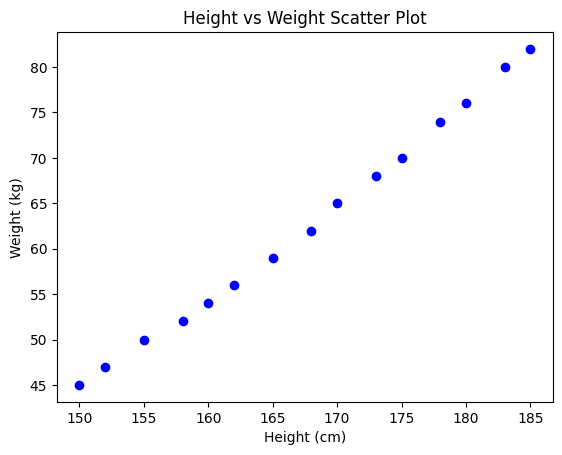

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Read the CSV dataset
df = pd.read_csv('/content/height_weight_dataset.csv')
# Step 3: Inspect the first few rows and column names
print(df.head())
print("\nColumns:", df.columns)

# Step 4: Plot Height vs Weight using correct column names
plt.scatter(df['Height(cm)'], df['Weight(kg)'], color='blue')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight Scatter Plot')
plt.show()

In [ ]:
# Divide our dataset into independent and dependent features
x = df[['Weight(kg)']]  # independent feature (2D)
y = df['Height(cm)']    # dependent feature (1D)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x.shape

(15, 1)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12, 1), (3, 1), (12,), (3,))

x_train_scaled (first 5 rows):
[[ 1.51086841]
 [-0.59120938]
 [ 0.19706979]
 [-1.11672882]
 [-1.37948855]]
x_test_scaled (all rows):
[[ 0.45982952]
 [ 0.98534896]
 [-1.5546617 ]]


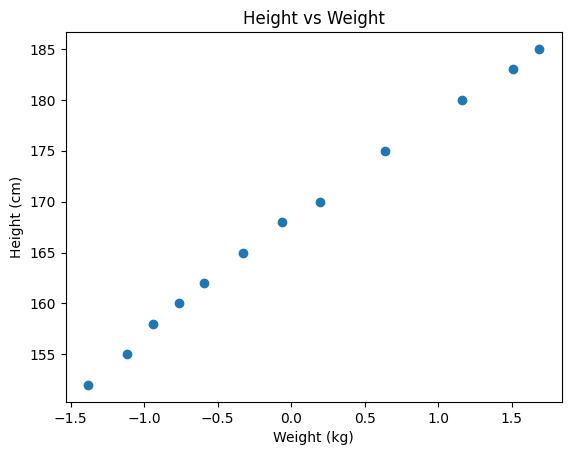

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Display first 5 rows
print("x_train_scaled (first 5 rows):")
print(x_train_scaled[:5])

print("x_test_scaled (all rows):")
print(x_test_scaled[:5])

# Scatter plot of training data
plt.scatter(x_train, y_train)  # Use y_train, not 'train'
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Height vs Weight")
plt.show()


In [ ]:
# train the simple linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("The slope or coefficient of weight",regressor.coef_)
print("The intercept of weight",regressor.intercept_)

The slope or coefficient of weight [10.56330582]
The intercept of weight 167.75


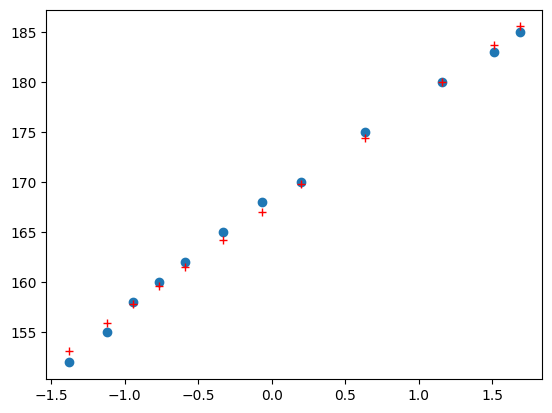

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r+')

In [ ]:
# Intercept and coefficient from the trained model
intercept = 65.4364
coef_weight = 1.26

# 1️⃣ Prediction of train data
y_pred_train = intercept + coef_weight * x_train  # Use * for multiplication
print("Predicted heights for training data (first 5 rows):")
print(y_pred_train[:5])

# 2️⃣ Prediction of test data
y_pred_test = intercept + coef_weight * x_test  # Use * for multiplication
print("Predicted heights for test data (first 5 rows):")
print(y_pred_test[:5])


Predicted heights for training data (first 5 rows):
[[67.3400942 ]
 [64.69147618]
 [65.68470794]
 [64.02932168]
 [63.69824443]]
Predicted heights for test data (first 5 rows):
[[66.01578519]
 [66.67793969]
 [63.47752626]]


In [ ]:
y_pred_test = regressor.predict(x_test)
y_pred_test,y_test

(array([172.6073198 , 178.15854243, 151.32763305]),
 9     173
 11    178
 0     150
 Name: Height(cm), dtype: int64)

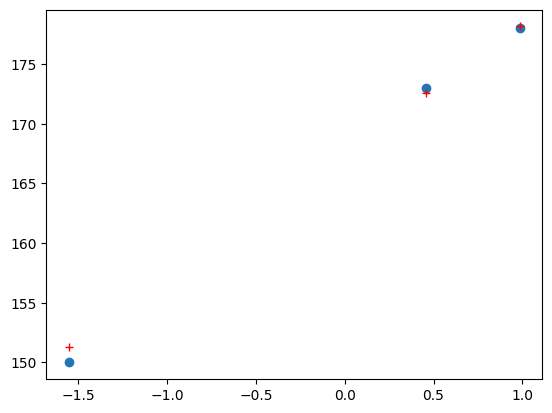

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,'r+')

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1️⃣ Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)

# 2️⃣ Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)

# 3️⃣ Root Mean Squared Error
rmse = np.sqrt(mse)

# 4️⃣ R-squared
r2 = r2_score(y_test, y_pred_test)

# 5️⃣ Adjusted R-squared
n = len(y_test)       # number of samples
p = x_test.shape[1]   # number of independent variables
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 6️⃣ Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adjusted_r2)


Mean Squared Error (MSE): 0.6473143196662053
Mean Absolute Error (MAE): 0.6262852272121885
Root Mean Squared Error (RMSE): 0.804558462553347
R-squared (R2): 0.9956458678049358
Adjusted R-squared: 0.9912917356098716


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.9956458678049358

In [ ]:
#display adjacent r-squared
from sklearn.metrics import r2_score

# R-squared
r2 = r2_score(y_test, y_pred_test)

# Adjusted R-squared in one line
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


R-squared: 0.9956458678049358
Adjusted R-squared: 0.9912917356098716


In [ ]:
# New data point
new_weight = 80

# Scale the new weight using the same scaler
scaled_weight = scaler.transform([[new_weight]])

# Display scaled value
print("Scaled weight:", scaled_weight)


Scaled weight: [[80.]]


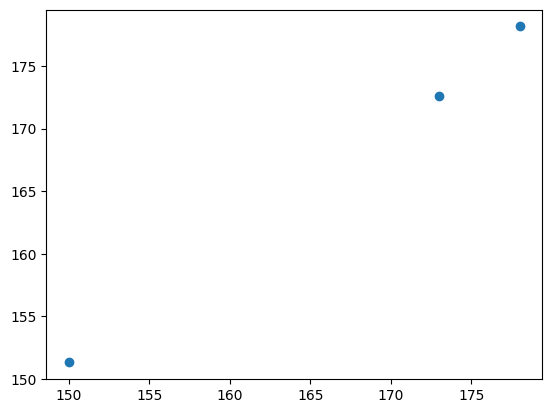

In [ ]:
#assumptions
#plot  a catter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [ ]:
#residuals
residuals = y_test,y_pred_test
residuals

(9     173
 11    178
 0     150
 Name: Height(cm), dtype: int64,
 array([172.6073198 , 178.15854243, 151.32763305]))

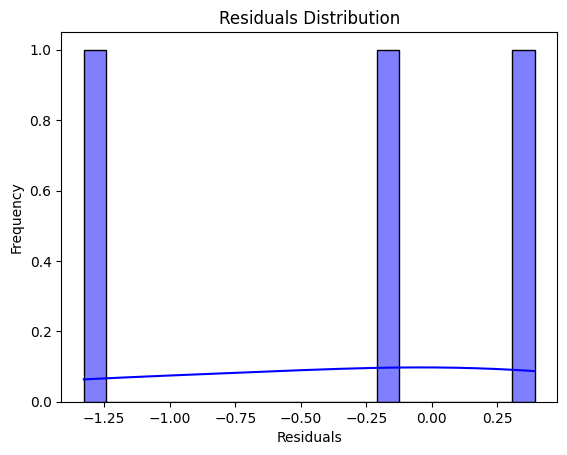

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_test

# Plot distribution of residuals
sns.histplot(residuals, kde=True, bins=20, color='blue')  # Recommended in newer Seaborn
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()
